Calories_consumed-> predict weight gained using calories consumed

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading a csv file using pandas library
calories=pd.read_csv("calories_consumed.csv")
calories.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
#check the information present in the data set
calories.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weight gained (grams)    14 non-null int64
Calories Consumed        14 non-null int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [4]:
#display the columns
calories.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [5]:
#rename the columns in calories
calories=calories.rename(columns={"Weight gained (grams)":"Weight_gained","Calories Consumed":"Calories_Consumed"})

In [6]:
calories.head()

,Weight_gained,Calories_Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


# Visulaization

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

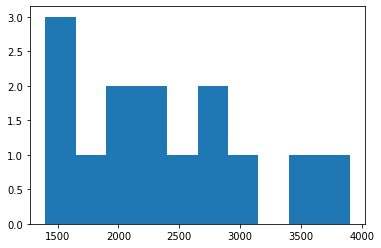

In [7]:
plt.hist(calories.Calories_Consumed)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8ab0faf88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8ab0fdb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8ab0fa788>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8ab103a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8aa908548>],
 'means': []}

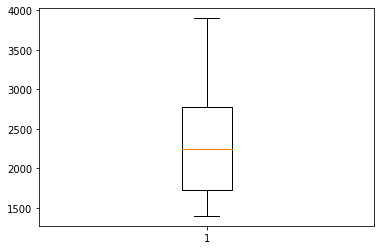

In [8]:
plt.boxplot(calories.Calories_Consumed)

Text(0, 0.5, 'Weight_gained')

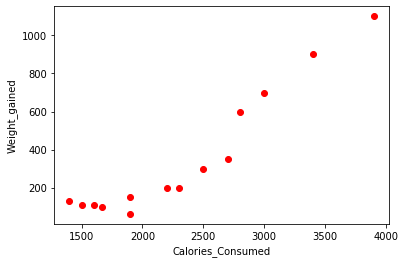

In [9]:
plt.plot(calories.Calories_Consumed,calories.Weight_gained,"ro"); plt.xlabel("Calories_Consumed");plt.ylabel("Weight_gained")

In [10]:
#check the correlation between Calories_Consumed,Weight_gained
calories.corr()

,Weight_gained,Calories_Consumed
Weight_gained,1.000000,0.946991
Calories_Consumed,0.946991,1.000000


good correlation between the variables

In [11]:
 calories.Weight_gained.corr(calories.Calories_Consumed)

0.9469910088554458

In [12]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf

In [13]:
#building a model
model1=smf.ols("Weight_gained~Calories_Consumed",data=calories).fit()


In [14]:
type(model1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [15]:
## For getting coefficients of the varibles used in equation
model1.params

Intercept           -625.752356
Calories_Consumed      0.420157
dtype: float64

In [16]:
# P-values for the variables and R-squared value for prepared model
model1.summary()

C:\Users\sathi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.86e-07
Time:                        15:41:13   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories_Consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here we get R-squared value is 	0.897

In [17]:
model1.conf_int(0.05)   # 95% confidence interval

,0,1
Intercept,-845.426655,-406.078057
Calories_Consumed,0.330506,0.509807


# prediction

In [18]:
model1_pred=model1.predict(calories)

In [19]:
model1_pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

Text(0, 0.5, 'Weight')

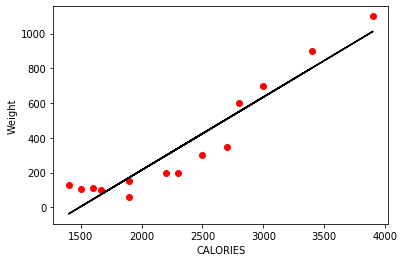

In [20]:
# Visualization of regresion line over the scatter plot of Weight_gained ,Calories_Consumed
plt.scatter(x=calories['Calories_Consumed'],y=calories['Weight_gained'],color='red');
plt.plot(calories['Calories_Consumed'],model1_pred,color='black');
plt.xlabel('CALORIES');plt.ylabel('Weight')

In [21]:
#check the RMSE values
from ml_metrics import rmse
rmse(model1_pred,calories.Weight_gained)

103.30250194726932

Root mean square error rate is very high, se we have to improve our model using different transformation methods

In [22]:
#check the correlation between predicted value and actual values
model1_pred.corr(calories.Weight_gained)

0.9469910088554458

In [23]:
# Transforming variables for accuracy


LOGARITHMIC TRANSFORMATION

In [24]:
model2=smf.ols("Weight_gained~np.log(Calories_Consumed)",data=calories).fit()

In [25]:
model2

In [26]:
## For getting coefficients of the varibles used in equation
model2.params

Intercept                   -6955.650125
np.log(Calories_Consumed)     948.371723
dtype: float64

In [27]:
# P-values for the variables and R-squared value for prepared model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.25e-05
Time:                        15:41:14   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Calories_Consumed)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here we get R-squared value is 0.808

In [28]:
#prediction
model2_pred=model2.predict(calories)
model2_pred

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

Text(0, 0.5, 'Weight')

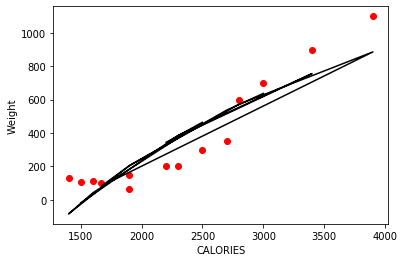

In [29]:
# Visualization of regresion line over the scatter plot of Weight_gained ,Calories_Consumed
plt.scatter(x=calories['Calories_Consumed'],y=calories['Weight_gained'],color='red');
plt.plot(calories['Calories_Consumed'],model2_pred,color='black');
plt.xlabel('CALORIES');plt.ylabel('Weight')

In [30]:
#check the RMSE values
rmse(model2_pred,calories.Weight_gained)

141.00538169425104

high error rate

In [31]:
#EXPONENTIAL TRANSFORMATION
model3=smf.ols("np.log(Weight_gained)~Calories_Consumed",data=calories).fit()

In [32]:
# P-values for the variables and R-squared value for prepared model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Weight_gained)   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.867
Method:                    Least Squares   F-statistic:                     86.04
Date:                   Tue, 25 Aug 2020   Prob (F-statistic):           8.02e-07
Time:                           15:41:15   Log-Likelihood:                -3.3244
No. Observations:                     14   AIC:                             10.65
Df Residuals:                         12   BIC:                             11.93
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8387      0.299      9.479      0.000       2.186       3.491
Calories_Consumed     0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared:	0.878

In [33]:
#prediction
model3_pred=model3.predict(calories)
model3_pred

0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

Text(0, 0.5, 'Weight')

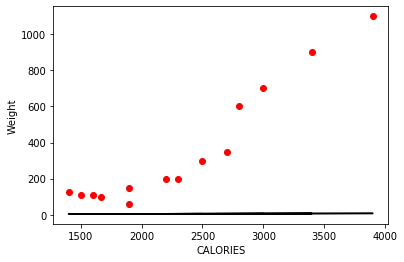

In [34]:
# Visualization of regresion line over the scatter plot of Weight_gained ,Calories_Consumed
plt.scatter(x=calories['Calories_Consumed'],y=calories['Weight_gained'],color='red');
plt.plot(calories['Calories_Consumed'],model3_pred,color='black');
plt.xlabel('CALORIES');plt.ylabel('Weight')

In [41]:
# as we have used log(Weight_gained) in preparing model so we need to convert it back
pred3_back=np.exp(model3_pred)

In [42]:
#check the RMSE values
rmse(pred3_back,calories.Weight_gained)

118.0451572011805

#higher error rate

#QUADRATIC TRANSFORMATION

In [36]:

calories["calor_sqrt"]=calories.Calories_Consumed*calories.Calories_Consumed
model4=smf.ols("Weight_gained~Calories_Consumed+calor_sqrt",data=calories).fit()

In [37]:
# P-values for the variables and R-squared value for prepared model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           5.55e-08
Time:                        15:41:16   Log-Likelihood:                -79.425
No. Observations:                  14   AIC:                             164.9
Df Residuals:                      11   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           203.2585    243.624      0.834      0.422    -332.955     739.472
Calories_Consumed    -0.2919      0.202     -1.444      0.177      -0.737       0.153
calor_sqrt            0.0001   3.92e-05      3.561      0.004    5.33e-05       0.000
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.996
Skew:                           0.324   Prob(JB):                        0.608
Kurtosis:                       1.865   Cond. No.                     8.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared:	0.952

In [52]:
##prediction
model4_pred=model4.predict(calories)
model4_pred

0       79.333455
1      269.953635
2      823.649454
3      236.359838
4      345.512323
5       93.394702
6       68.062571
7      152.320630
8      479.778088
9     1186.943943
10     104.897842
11     152.320630
12     432.232469
13     583.240419
dtype: float64

In [61]:
model4.conf_int(0.05)

,0,1
Intercept,-332.955294,739.472210
Calories_Consumed,-0.736713,0.152925
calor_sqrt,0.000053,0.000226


In [53]:
#check the RMSE values
rmse(model4_pred,calories.Weight_gained)

70.40751529831554

#higher error rate

we build four model

model1:R-squared:	0.897, RMSE:103.3025

model2: R-squared:	0.808,RMSE: 141.00538169425104

model3:R-squared:	0.878, RMSE:118.04515

model4:R-squared:	0.952, RMSE:70



# so we will consider the model having highest R-Squared value which is the quadratic transformation - model4

In [45]:
# getting residuals of the entire data set
resid = model4.resid_pearson 

In [46]:
resid

array([ 0.36090148, -0.88069107,  0.96122588, -0.45775726, -0.57298376,
        0.20905472,  0.75459064, -1.13710421,  1.51355057, -1.09459293,
       -0.06166207, -0.0292159 , -1.03527717,  1.46996107])

Text(0, 0.5, 'Actual')

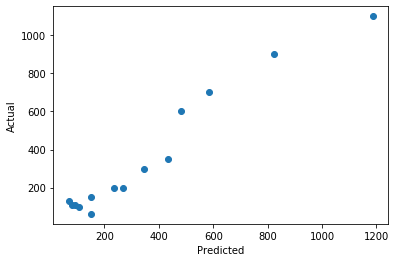

In [47]:
# Predicted vs actual values
plt.scatter(x=model4_pred,y=calories.Weight_gained);plt.xlabel("Predicted");plt.ylabel("Actual")

In [ ]:
 #Create data a new dataframe that contains actual weight and predicted weight

In [58]:
pred=pd.DataFrame(model4_pred)
data=calories
new_df=pd.concat([data["Weight_gained"],pred],axis=1)
new_df.columns=["Actual_weight","Predicted_Weight"]

In [59]:
new_df

,Actual_weight,Predicted_Weight
0,108,79.333455
1,200,269.953635
2,900,823.649454
3,200,236.359838
4,300,345.512323
5,110,93.394702
6,128,68.062571
7,62,152.320630
8,600,479.778088
9,1100,1186.943943
